In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Random seed
np.random.seed(42)

print("="*80)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*80)

STEP 2: EXPLORATORY DATA ANALYSIS


In [2]:
# LOADING CLEANED DATA
print("\n2.1 Loading cleaned data...")

demand = pd.read_csv('demand_clean.csv')
plants = pd.read_csv('plants_clean.csv')
costs = pd.read_csv('costs_clean.csv')

print(f"Demand: {demand.shape}")
print(f"Plants: {plants.shape}")
print(f"Costs: {costs.shape}")

# Get feature names
demand_features = [col for col in demand.columns 
                   if col.startswith('DF') and col not in ['DF_region', 'DF_daytype']]
plant_features = [col for col in plants.columns if col.startswith('PF')]

print(f"\nDemand features: {len(demand_features)}")
print(f"Plant features: {len(plant_features)}")


2.1 Loading cleaned data...
Demand: (500, 15)
Plants: (48, 21)
Costs: (24000, 3)

Demand features: 12
Plant features: 18



2.2 Analyzing demand features...

Demand Feature Statistics:
                DF1           DF2           DF3         DF4           DF5  \
count  5.000000e+02  5.000000e+02  5.000000e+02  500.000000  5.000000e+02   
mean  -1.776357e-17 -1.421085e-17 -2.131628e-17    0.000000 -2.664535e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00    1.001002  1.001002e+00   
min   -2.757626e+00 -3.421668e+00 -3.284737e+00   -2.818235 -2.818864e+00   
25%   -6.200328e-01 -6.505941e-01 -7.053274e-01   -0.666159 -5.538019e-01   
50%   -2.538195e-02 -2.495334e-02 -1.092997e-02   -0.023115  2.429897e-02   
75%    6.506713e-01  6.103998e-01  6.660970e-01    0.658063  6.352850e-01   
max    4.197192e+00  2.993850e+00  2.882233e+00    3.097916  2.932800e+00   

                DF6           DF7         DF8           DF9          DF10  \
count  5.000000e+02  5.000000e+02  500.000000  5.000000e+02  5.000000e+02   
mean   4.973799e-17 -2.131628e-17    0.000000  2.842171e-17 -2.309264e-17   
std    1.0010

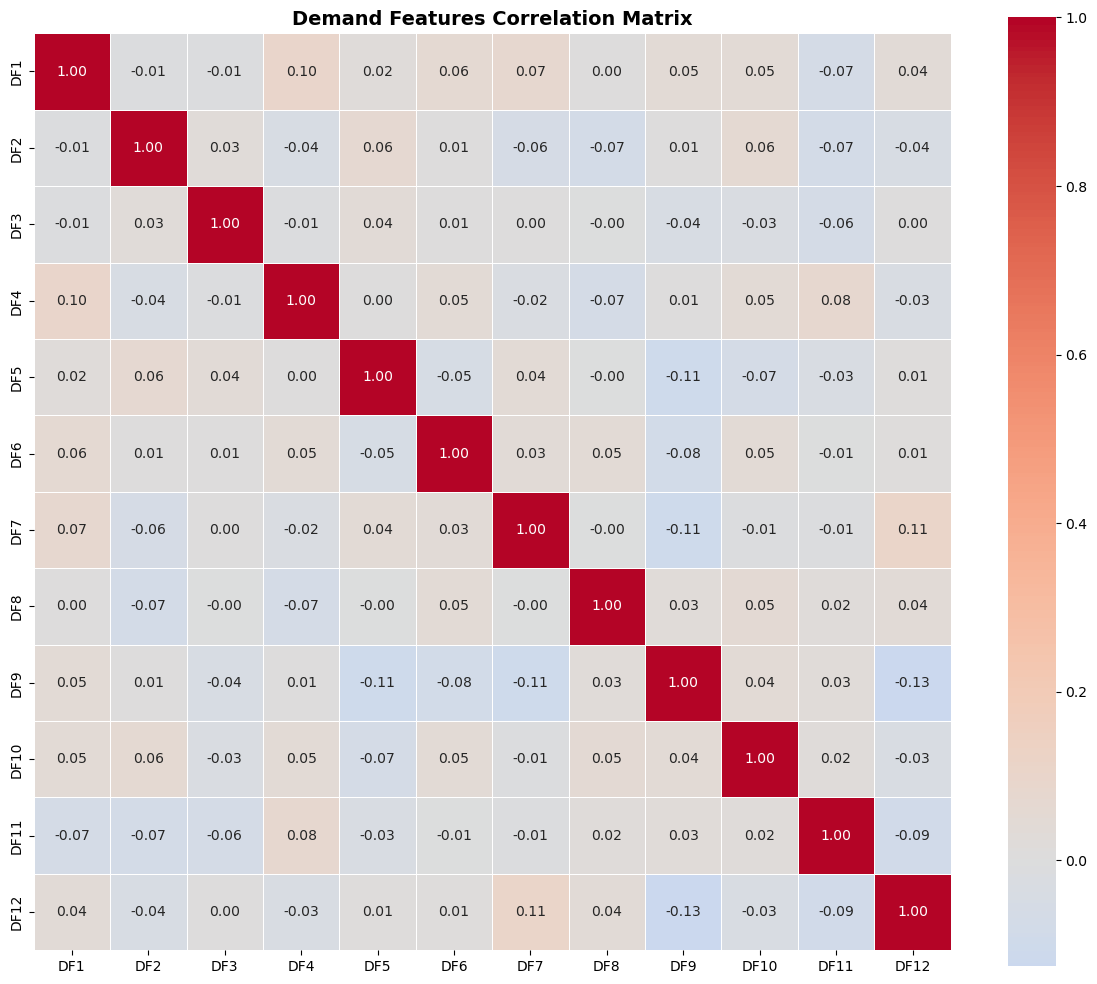


FIGURE 2: Distribution of Demand Features
 Saved: fig_demand_distributions.png


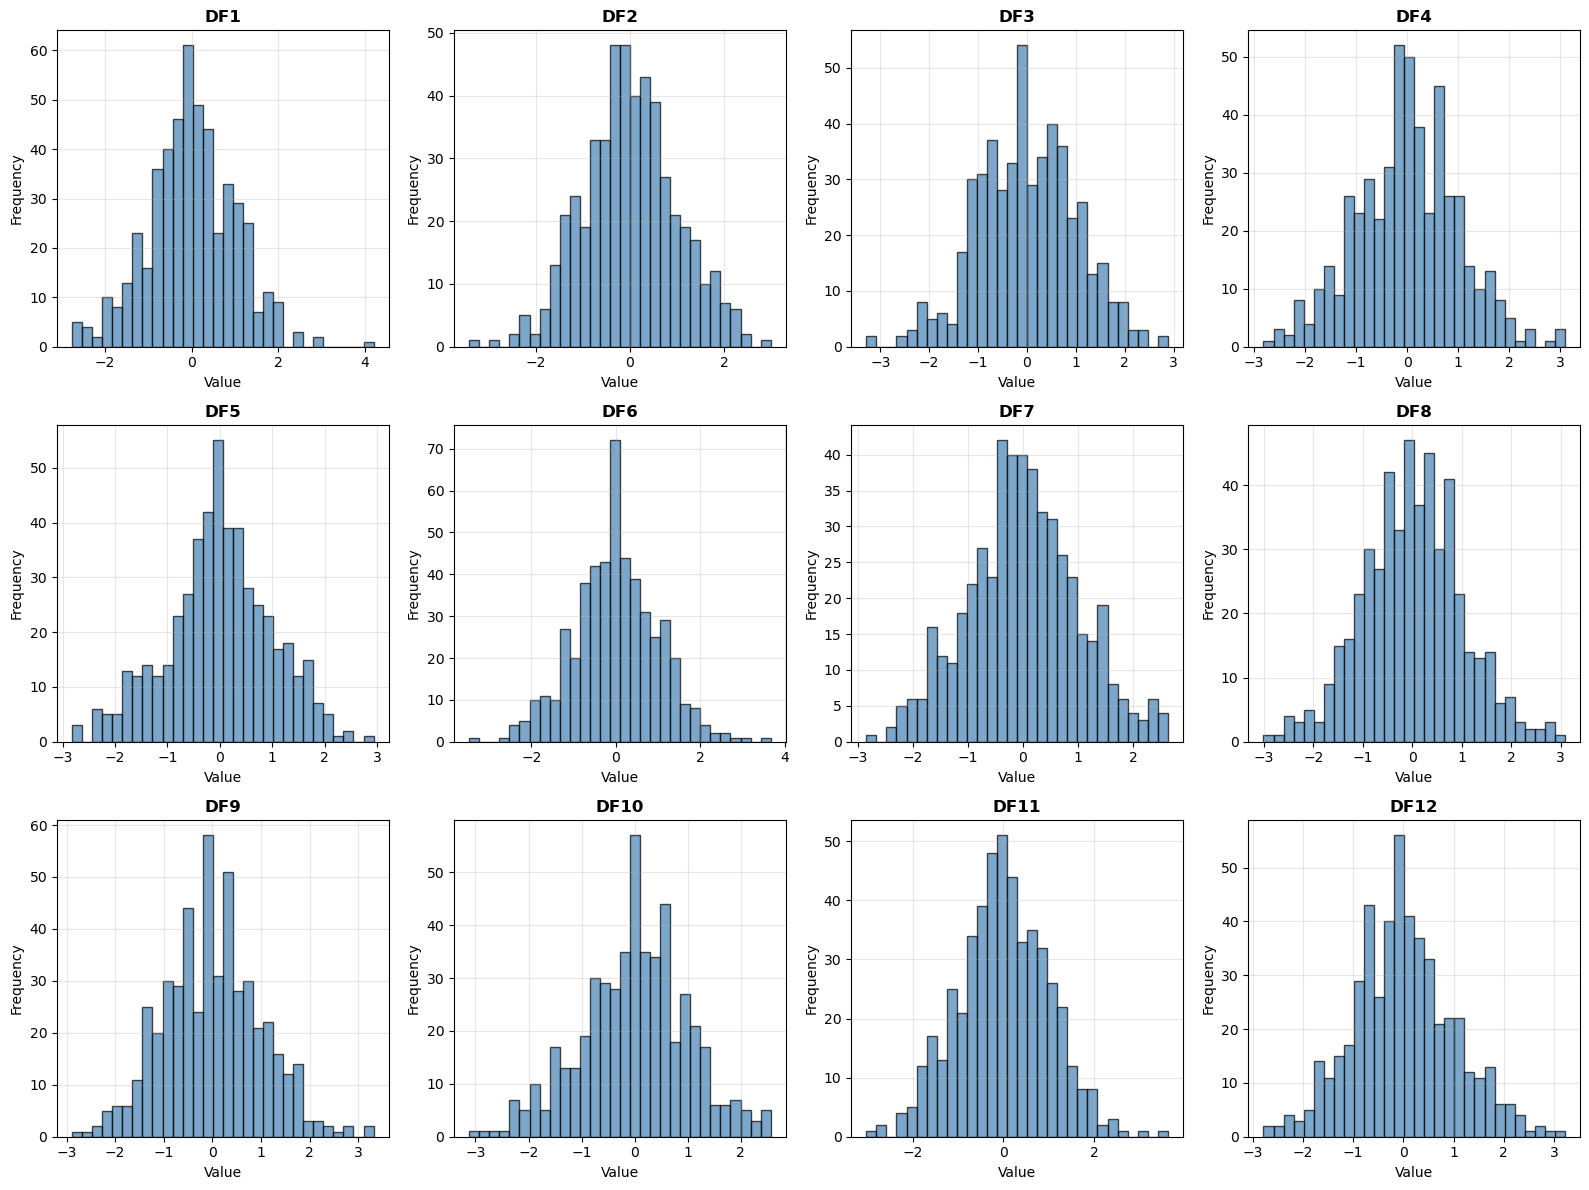


Demand by Region:
DF_region
APAC     115
EU       339
LATAM     46
dtype: int64

Demand by Day Type:
DF_daytype
Holiday     26
Weekday    352
Weekend    122
dtype: int64


In [3]:
# ANALYZING DEMAND FEATURES
print("\n2.2 Analyzing demand features...")

# Show basic statistics
print("\nDemand Feature Statistics:")
print(demand[demand_features].describe())

print("\n" + "="*80)
print("FIGURE 1: Demand Features Correlation Heatmap")
print("="*80)

plt.figure(figsize=(12, 10))
correlation = demand[demand_features].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Demand Features Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
# SAVE FIRST, THEN SHOW
plt.savefig('fig_demand_correlation.png', dpi=300, bbox_inches='tight')
print("Saved: fig_demand_correlation.png")
plt.show()  # Now display in notebook

print("\n" + "="*80)
print("FIGURE 2: Distribution of Demand Features")
print("="*80)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(demand_features):
    axes[i].hist(demand[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

# Hide unused subplots
for i in range(len(demand_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
# SAVE FIRST, THEN SHOW
plt.savefig('fig_demand_distributions.png', dpi=300, bbox_inches='tight')
print(" Saved: fig_demand_distributions.png")
plt.show()  # Display in notebook

# Summary by region and day type
print("\nDemand by Region:")
region_counts = demand.groupby('DF_region').size()
print(region_counts)

print("\nDemand by Day Type:")
daytype_counts = demand.groupby('DF_daytype').size()
print(daytype_counts)



2.3 Analyzing cost data...

Cost Statistics:
count    24000.000000
mean        56.455131
std         12.865354
min         15.129000
25%         50.125750
50%         56.472000
75%         62.358250
max        372.198000
Name: Cost_USD_per_MWh, dtype: float64

Cost Distribution Visualizations
 Saved: fig_cost_distribution.png


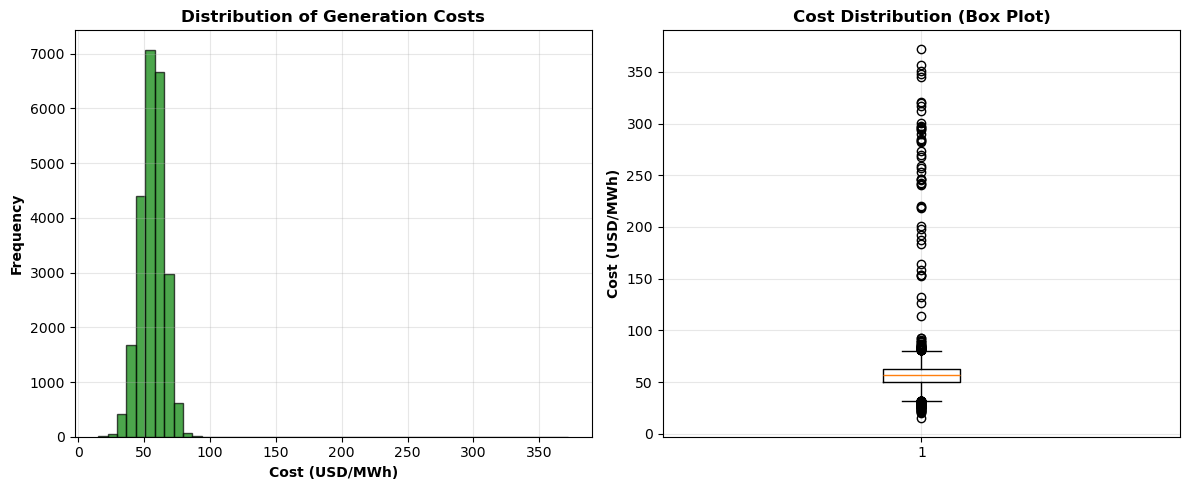


FIGURE 3: Cost Distribution by Plant Type

Average Cost by Plant Type:
                 mean        std     min      max
Plant Type                                       
Coal        56.814046  13.143784  20.273  351.135
Gas         56.591551  11.622899  21.905  348.230
Hydro       57.474435  12.543375  15.129  297.180
Nuclear     59.837388  13.597640  34.435  345.330
Solar       53.143152  14.413176  22.513  372.198
Wind        55.632635  13.022357  27.917  319.782
 Saved: fig_cost_by_plant_type.png


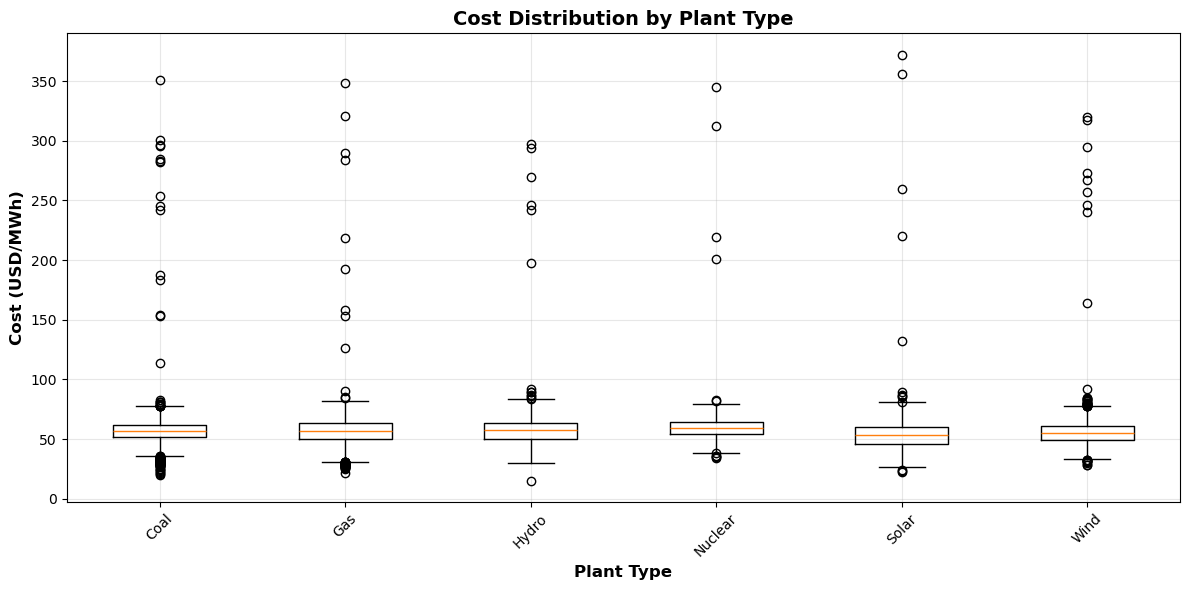

In [5]:
# ANALYZING COST DATA
print("\n2.3 Analyzing cost data...")

print("\nCost Statistics:")
print(costs['Cost_USD_per_MWh'].describe())

# Cost distribution plots
print("\n" + "="*80)
print("Cost Distribution Visualizations")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(costs['Cost_USD_per_MWh'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Cost (USD/MWh)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Distribution of Generation Costs', fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(costs['Cost_USD_per_MWh'])
axes[1].set_ylabel('Cost (USD/MWh)', fontweight='bold')
axes[1].set_title('Cost Distribution (Box Plot)', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('fig_cost_distribution.png', dpi=300, bbox_inches='tight')
print(" Saved: fig_cost_distribution.png")
plt.show()
print("\n" + "="*80)
print("FIGURE 3: Cost Distribution by Plant Type")
print("="*80)

# Merging costs with plant types
costs_with_type = costs.merge(plants[['Plant ID', 'Plant Type']], on='Plant ID')

# Statistics by plant type
print("\nAverage Cost by Plant Type:")
type_stats = costs_with_type.groupby('Plant Type')['Cost_USD_per_MWh'].agg(['mean', 'std', 'min', 'max'])
print(type_stats)

# Box plot by plant type
plt.figure(figsize=(12, 6))
plant_types = sorted(costs_with_type['Plant Type'].unique())
data_by_type = [costs_with_type[costs_with_type['Plant Type']==pt]['Cost_USD_per_MWh'] 
                for pt in plant_types]

plt.boxplot(data_by_type, labels=plant_types)
plt.xlabel('Plant Type', fontweight='bold', fontsize=12)
plt.ylabel('Cost (USD/MWh)', fontweight='bold', fontsize=12)
plt.title('Cost Distribution by Plant Type', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig_cost_by_plant_type.png', dpi=300, bbox_inches='tight')
print(" Saved: fig_cost_by_plant_type.png")
plt.show()



2.4 Calculating baseline performance...

TABLE 1: Baseline Performance Summary

Best 5 Plants (Lowest RMSE):
Plant_ID      RMSE  Mean_Error  Std_Error
     P28  8.528011   -6.571708   5.440480
     P15 10.191653   -7.623764   6.770502
     P26 11.662886  -10.155042   5.741425
     P42 14.596115   -7.370012  12.611407
     P14 15.172392  -12.495460   8.614719

Worst 5 Plants (Highest RMSE):
Plant_ID      RMSE  Mean_Error  Std_Error
     P29 29.184293  -25.872322  13.517076
     P55 29.265989  -24.467186  16.073944
      P1 29.810550  -25.480508  15.488460
     P19 29.816862  -26.393366  13.886005
      P9 30.942096  -23.528808  20.115112

Statistics:
  Average RMSE: $22.55
  Best RMSE: $8.53
  Worst RMSE: $30.94

FIGURE 4: Baseline RMSE for Each Plant
 Saved: fig_baseline_rmse.png


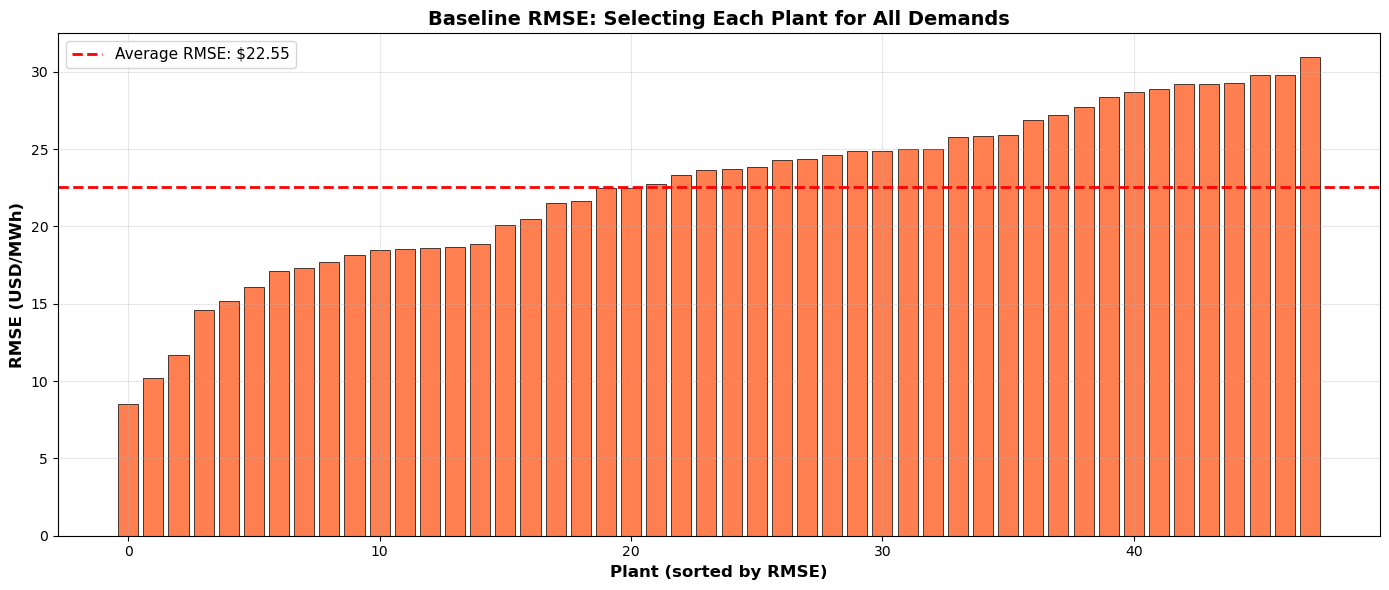

 Saved: baseline_performance.csv


In [6]:
# CALCULATING BASELINE PERFORMANCE
print("\n2.4 Calculating baseline performance...")

# For each demand, find the best (minimum) cost
best_costs = costs.groupby('Demand ID')['Cost_USD_per_MWh'].min().reset_index()
best_costs.columns = ['Demand ID', 'Best_Cost']

# Calculate RMSE for each plant
baseline_results = []

for plant_id in plants['Plant ID'].unique():
    # Get costs for this plant
    plant_costs = costs[costs['Plant ID'] == plant_id].copy()
    
    # Merge with best costs
    plant_costs = plant_costs.merge(best_costs, on='Demand ID')
    
    # Calculate error = best_cost - actual_cost
    plant_costs['Error'] = plant_costs['Best_Cost'] - plant_costs['Cost_USD_per_MWh']
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean(plant_costs['Error']**2))
    
    baseline_results.append({
        'Plant_ID': plant_id,
        'RMSE': rmse,
        'Mean_Error': plant_costs['Error'].mean(),
        'Std_Error': plant_costs['Error'].std()
    })

# Create dataframe and sort by RMSE
baseline_performance = pd.DataFrame(baseline_results)
baseline_performance = baseline_performance.sort_values('RMSE')
print("\n" + "="*80)
print("TABLE 1: Baseline Performance Summary")
print("="*80)

print("\nBest 5 Plants (Lowest RMSE):")
print(baseline_performance.head(5).to_string(index=False))

print("\nWorst 5 Plants (Highest RMSE):")
print(baseline_performance.tail(5).to_string(index=False))

print(f"\nStatistics:")
print(f"  Average RMSE: ${baseline_performance['RMSE'].mean():.2f}")
print(f"  Best RMSE: ${baseline_performance['RMSE'].min():.2f}")
print(f"  Worst RMSE: ${baseline_performance['RMSE'].max():.2f}")
print("\n" + "="*80)
print("FIGURE 4: Baseline RMSE for Each Plant")
print("="*80)

plt.figure(figsize=(14, 6))
plt.bar(range(len(baseline_performance)), baseline_performance['RMSE'], 
        color='coral', edgecolor='black', linewidth=0.5)
plt.axhline(y=baseline_performance['RMSE'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f'Average RMSE: ${baseline_performance["RMSE"].mean():.2f}')
plt.xlabel('Plant (sorted by RMSE)', fontweight='bold', fontsize=12)
plt.ylabel('RMSE (USD/MWh)', fontweight='bold', fontsize=12)
plt.title('Baseline RMSE: Selecting Each Plant for All Demands', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('fig_baseline_rmse.png', dpi=300, bbox_inches='tight')
print(" Saved: fig_baseline_rmse.png")
plt.show() 

# Save baseline results to CSV
baseline_performance.to_csv('baseline_performance.csv', index=False)
print(" Saved: baseline_performance.csv")